In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
!wget https://raw.githubusercontent.com/catarinaluz/Treinamento-visao/main/images/Moedas%20e%20linhas.jpeg

--2023-02-26 20:12:39--  https://raw.githubusercontent.com/catarinaluz/Treinamento-visao/main/images/Moedas%20e%20linhas.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68568 (67K) [image/jpeg]
Saving to: ‘Moedas e linhas.jpeg’

Moedas e linhas.jpe 100%[===================>]  66.96K  --.-KB/s    in 0.001s  

2023-02-26 20:12:39 (53.5 MB/s) - ‘Moedas e linhas.jpeg’ saved [68568/68568]



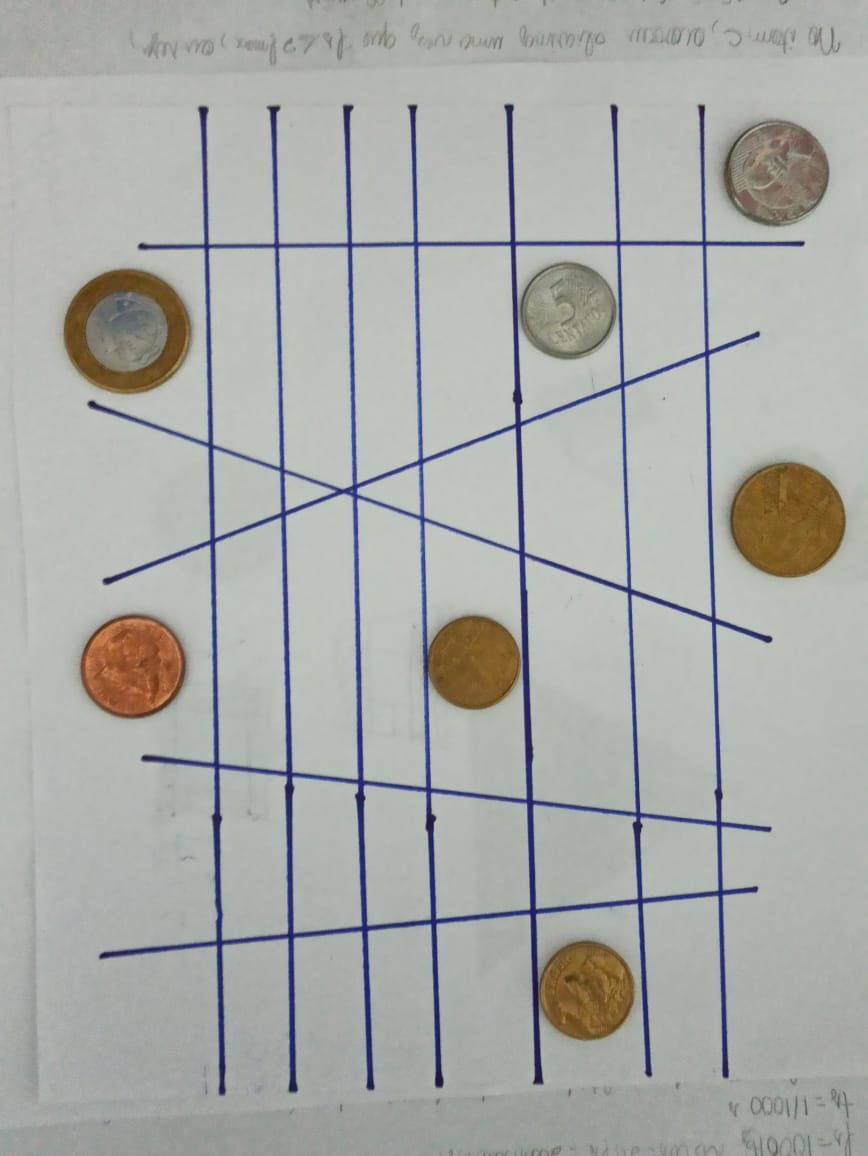

In [4]:
img = cv.imread('Moedas e linhas.jpeg')
cv2_imshow(img)

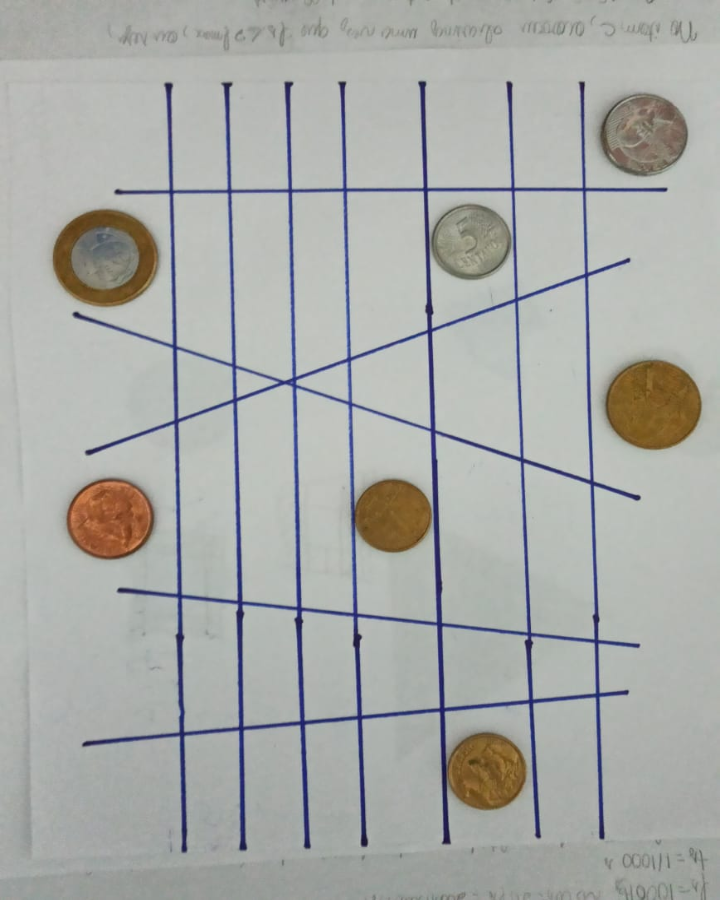

In [5]:
img = cv.resize(img,(720,900))
cv2_imshow(img)

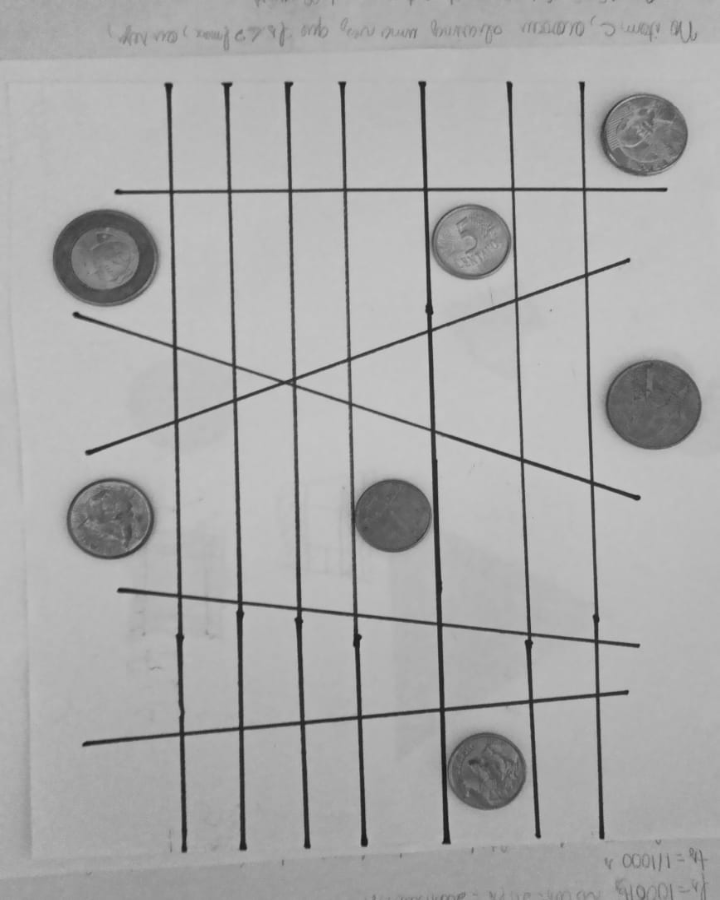

In [6]:
img_gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

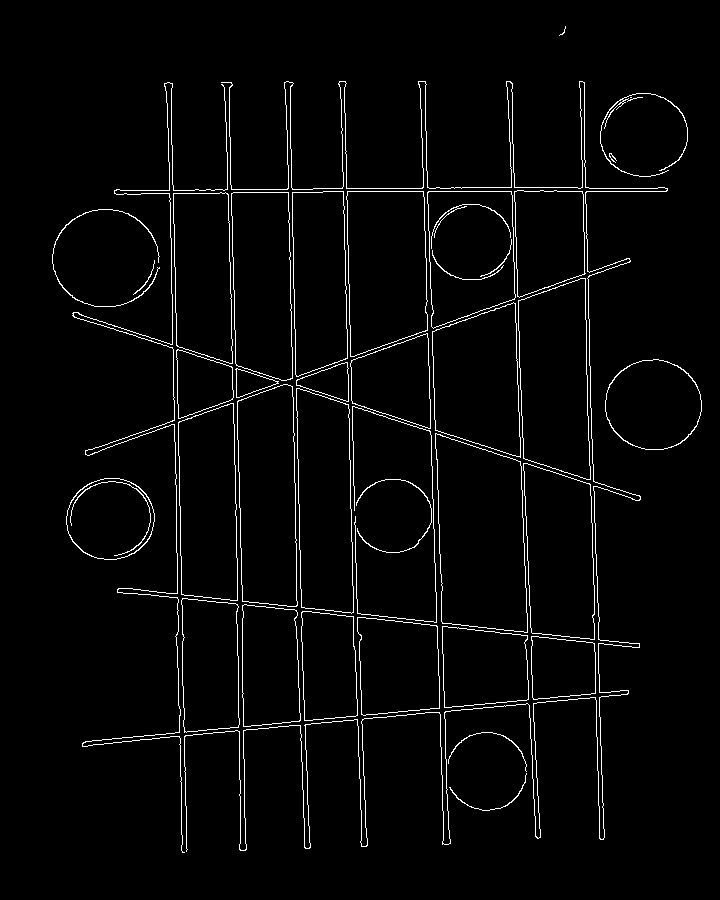

In [7]:
img_edge = cv.Canny(img_gray,150,300,3)
cv2_imshow(img_edge)

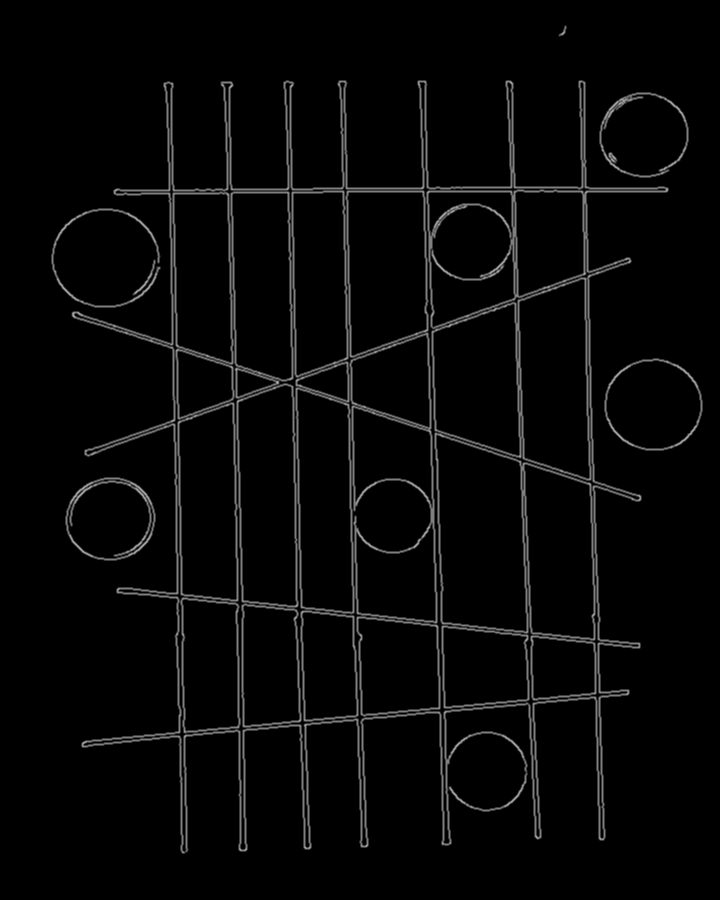

In [8]:
img_edge = cv.GaussianBlur(img_edge,(3,3),0,0)
cv2_imshow(img_edge)

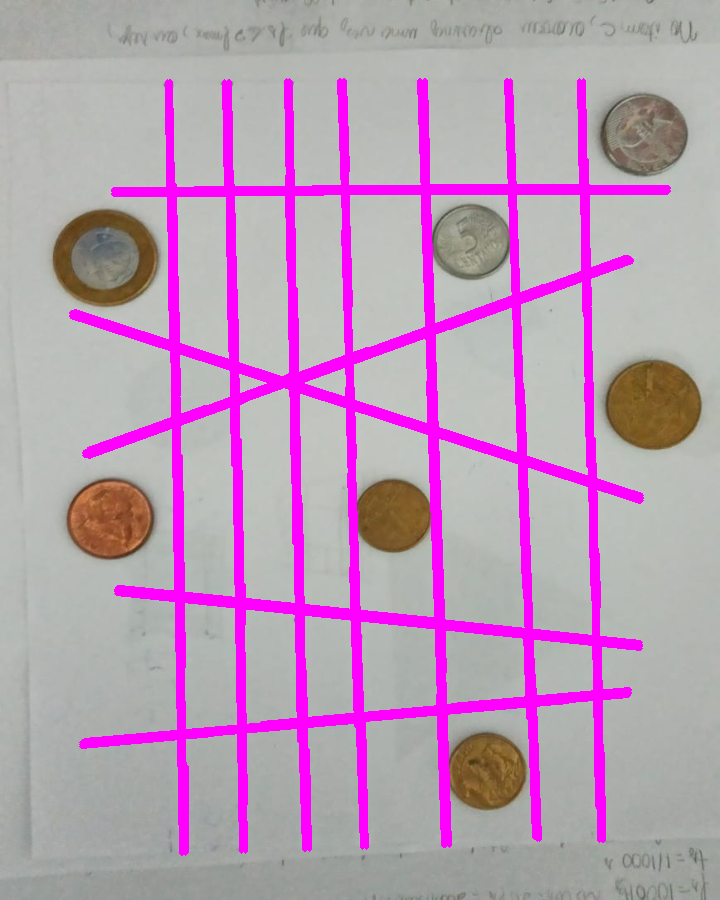

In [9]:
img_res = np.copy(img)
lines = np.squeeze(cv.HoughLinesP(img_edge,1,np.pi/180,50,None,50,10))
for i in range(0,len(lines)):
    cv.line(img_res,(lines[i][0],lines[i][1]), (lines[i][2], lines[i][3]),(255,0,255),3)
cv2_imshow(img_res)

In [12]:
circles = np.squeeze(cv.HoughCircles(img_gray, 
                         cv.HOUGH_GRADIENT,
                         1, 
                         img_gray.shape[0] / 8,
                         param1=100, 
                         param2=40,
                         minRadius=20, 
                         maxRadius=130))
for i in range(0,len(circles)):
  x = circles[i][0]
  y = circles[i][1]
  raio = circles[i][2]

  cv.circle(img_res,(int(x),int(y)),int(raio),(255,0,0),10)
  cv.circle(img_res,(int(x),int(y)),3,(255,0,0),3)

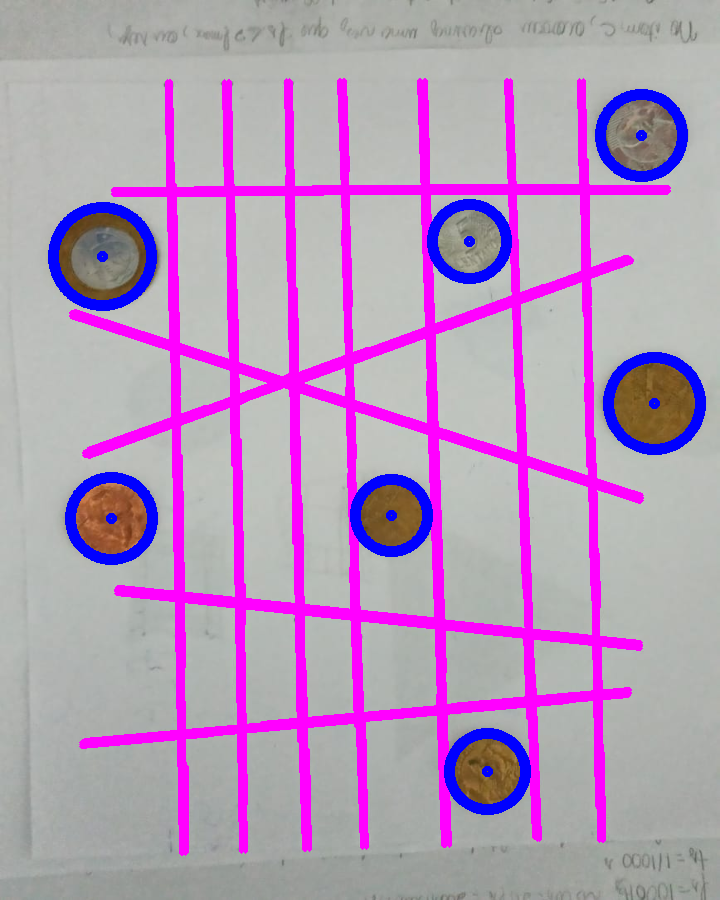

In [13]:
cv2_imshow(img_res)